In [1]:
import json
import os

import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from IPython.display import display, HTML
from shapely.ops import linemerge
from tqdm import tqdm

display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))
plt.style.use("dark_background")

In [2]:
root_dir = ".."

In [3]:
admin = gpd.read_parquet(os.path.join(root_dir, "results/input/admin-boundaries/admin-level-0.geoparquet"))
admin.geometry = admin.geometry.boundary
admin.geometry = admin.geometry.simplify(tolerance=0.1)

In [416]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.geometry = world.geometry.boundary

/tmp/ipykernel_887789/3219117478.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [33]:
edges = gpd.read_parquet(os.path.join(root_dir, "results/flow_allocation/project-thailand/edges.gpq"))

In [34]:
edges.sort_values("volume_tons", ascending=False).head(20)

,from_id,to_id,from_iso_a3,to_iso_a3,mode,cost_USD_t,geometry,value_kusd,volume_tons
335861,port1197_in,port1197_out,THA,THA,maritime,0.000000,None,3.429910e+08,1.732779e+08
338515,port111_land,port111_out,THA,THA,maritime,0.000000,None,3.240833e+08,1.719869e+08
1132,road_thailand-latest_28_8797,port111_land,THA,THA,maritime_road,4.000000,"LINESTRING (100.57530 13.70370, 100.57849 13.6...",3.237552e+08,1.718106e+08
59129,road_thailand-latest_28_8796,road_thailand-latest_28_8797,THA,THA,road,0.096650,"LINESTRING (100.56903 13.68613, 100.56955 13.6...",3.236246e+08,1.717442e+08
86800,road_thailand-latest_28_28175,road_thailand-latest_28_8796,THA,THA,road,0.001051,"LINESTRING (100.56889 13.68605, 100.56903 13.6...",3.235385e+08,1.717005e+08
86801,road_thailand-latest_28_27161,road_thailand-latest_28_28175,THA,THA,road,0.000032,"LINESTRING (100.56888 13.68605, 100.56889 13.6...",3.235385e+08,1.717005e+08
83118,road_thailand-latest_28_27160,road_thailand-latest_28_27161,THA,THA,road,0.016004,"LINESTRING (100.56824 13.68375, 100.56824 13.6...",3.234899e+08,1.716757e+08
83119,road_thailand-latest_28_21617,road_thailand-latest_28_27160,THA,THA,road,0.001192,"LINESTRING (100.56820 13.68357, 100.56824 13.6...",3.234740e+08,1.716676e+08
72740,road_thailand-latest_28_21616,road_thailand-latest_28_21617,THA,THA,road,0.098677,"LINESTRING (100.55847 13.67338, 100.55850 13.6...",3.233715e+08,1.716155e+08
72739,road_thailand-latest_28_8795,road_thailand-latest_28_21616,THA,THA,road,0.000357,"LINESTRING (100.55845 13.67333, 100.55847 13.6...",3.232989e+08,1.715786e+08


Text(0, 0.5, 'Frequency')

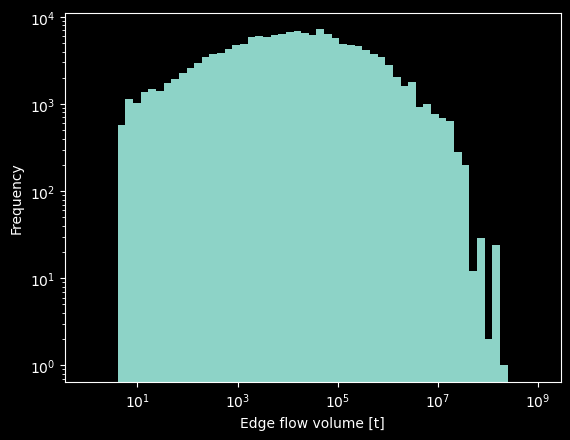

In [35]:
f, ax = plt.subplots()
min_non_zero = edges[edges.volume_tons != 0].volume_tons.min()
min_base_10_exp = int(np.floor(np.log10(min_non_zero)))
max_base_10_exp = int(np.ceil(np.log10(edges.volume_tons.max())))
ax.hist(
    edges.volume_tons,
    bins=np.logspace(
        min_base_10_exp,
        max_base_10_exp,
        60
    )
)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Edge flow volume [t]")
ax.set_ylabel("Frequency")

       volume_t_km
mode              
rail  5.831663e+08
road  1.549399e+12


Text(0, 0.5, 'Volume [t] / Distance [km]')

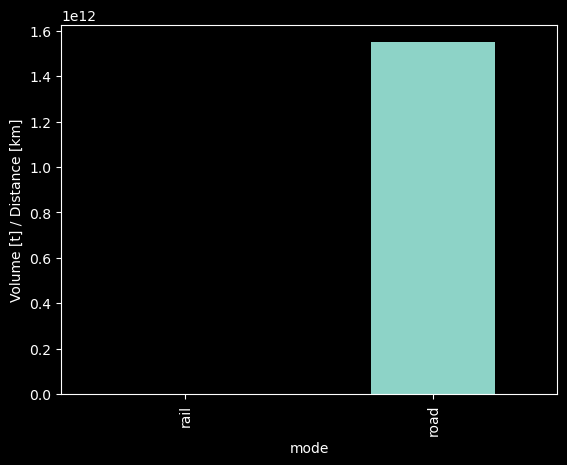

In [36]:
land_mask = edges["mode"].isin(("road", "rail"))
land = edges.loc[land_mask].copy()
land["distance_km"] = land["geometry"].to_crs(land.estimate_utm_crs()).length / 1000
land["volume_t_km"] = land.volume_tons / land.distance_km

modal_split = land.loc[:, ["volume_t_km"]].groupby(land["mode"]).sum()
print(modal_split)
f, ax = plt.subplots()
modal_split.volume_t_km.plot(kind="bar", ax=ax)
ax.set_ylabel("Volume [t] / Distance [km]")

<Axes: >

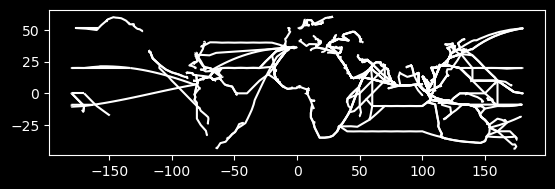

In [383]:
def chop_at_antimeridian(gdf: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    """
    Cut LineStrings either side of antimeridian, then drop the fragments that
        intersect with antimeridian.

    Warning: Will create new rows (split geometries) with duplicate indices.

    Args:
        gdf: Table with geometry to chop at antimeridian

    Returns:
        Table, potentially with new rows. No rows in the table should have
            geometries that cross the antimeridian.
    """
    assert set(gdf.geometry.type) == {'LineString'}
    
    def split_on_meridian(gdf: gpd.GeoDataFrame, meridian: shapely.geometry.LineString) -> gpd.GeoDataFrame:
        return gdf.assign(geometry=gdf.apply(lambda row: split(row.geometry, meridian), axis=1)).explode(index_parts=False)

    xlim = 179.9
    ylim = 90

    split_e = split_on_meridian(gdf, LineString([(xlim, ylim), (xlim, -ylim)]))
    split_e_and_w = split_on_meridian(split_e, LineString([(-xlim, ylim), (-xlim, -ylim)]))

    def crosses_antimeridian(row: pd.Series) -> bool:
        """
        Check if there are longitudes in a geometry that are near the antimeridian 
            (-180) and either side of it. If so, return true.
        """
        x, _ = row.geometry.coords.xy
        longitudes_near_antimeridian = np.array(x)[np.argwhere(np.abs(np.abs(x) - 180) < xlim).ravel()]
        if len(longitudes_near_antimeridian) == 0:
            return False
        hemispheres = np.unique(np.sign(longitudes_near_antimeridian))
        if (-1 in hemispheres) and (1 in hemispheres):
            return True
        else:
            return False

    return split_e_and_w[~split_e_and_w.apply(crosses_antimeridian, axis=1)]

chop_at_antimeridian(problem).plot()

array([-180., -150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60.,
         90.,  120.,  150.,  180.])

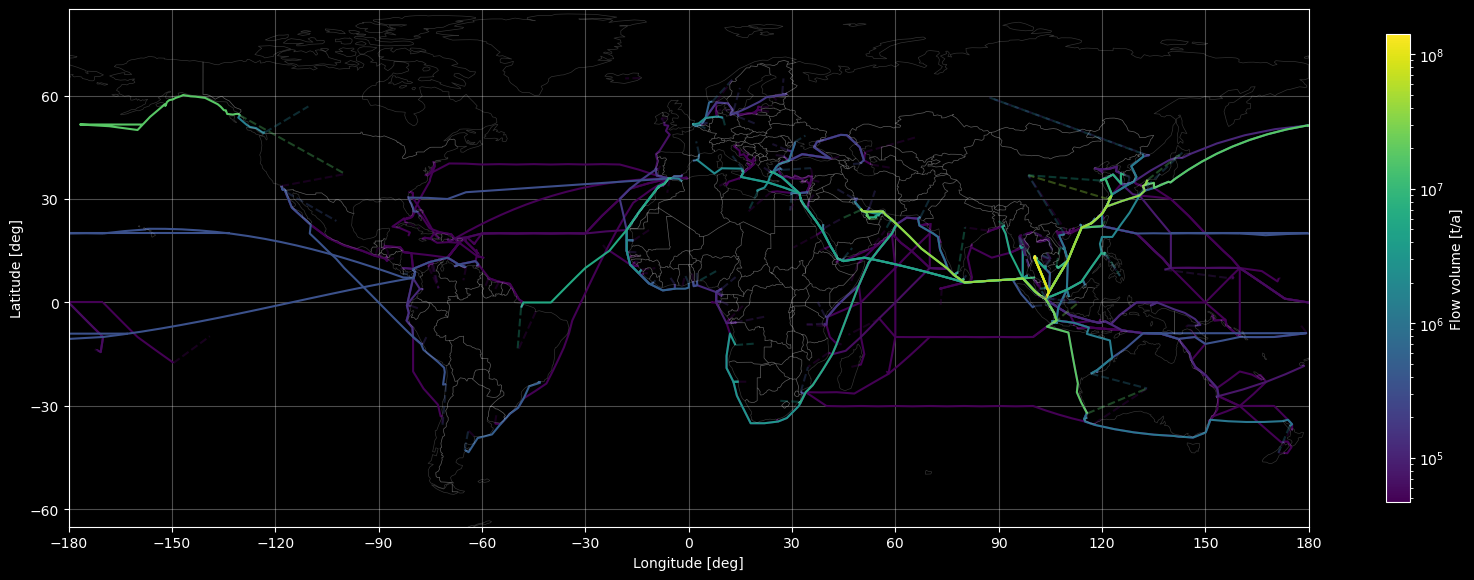

In [432]:
f, ax = plt.subplots(figsize=(20, 16))

edges_with_volume = edges[(edges.volume_tons != 0) & edges["mode"].isin({"maritime", "imaginary"})]
edges_with_volume_and_geometry = edges_with_volume[~edges_with_volume.geometry.isna()]
to_plot = chop_at_antimeridian(edges_with_volume_and_geometry)
not_imaginary_mask = to_plot["mode"] != "imaginary"

norm = LogNorm(10**np.log10(to_plot.volume_tons.quantile(0.5)), 10**np.log10(to_plot.volume_tons.max()))
crs_epsg: int = 4326

to_plot[not_imaginary_mask].sort_values("volume_tons").plot("volume_tons", ax=ax, norm=norm, legend=True, legend_kwds={"shrink": 0.38, "label": "Flow volume [t/a]"})
to_plot[~not_imaginary_mask].plot("volume_tons", ax=ax, norm=norm, ls="--", alpha=0.35)
world.plot(ax=ax, lw=0.5, alpha=0.2)
ax.set_xticks(np.linspace(-180, 180, 13))
ax.set_yticks([-60, -30, 0, 30, 60])
ax.set_ylim(-65, 85)
ax.set_xlim(-180, 180)
ax.grid(alpha=0.3)
ax.set_xlabel("Longitude [deg]")
ax.set_ylabel("Latitude [deg]")
f.savefig("trade_flow_allocation_global.png")

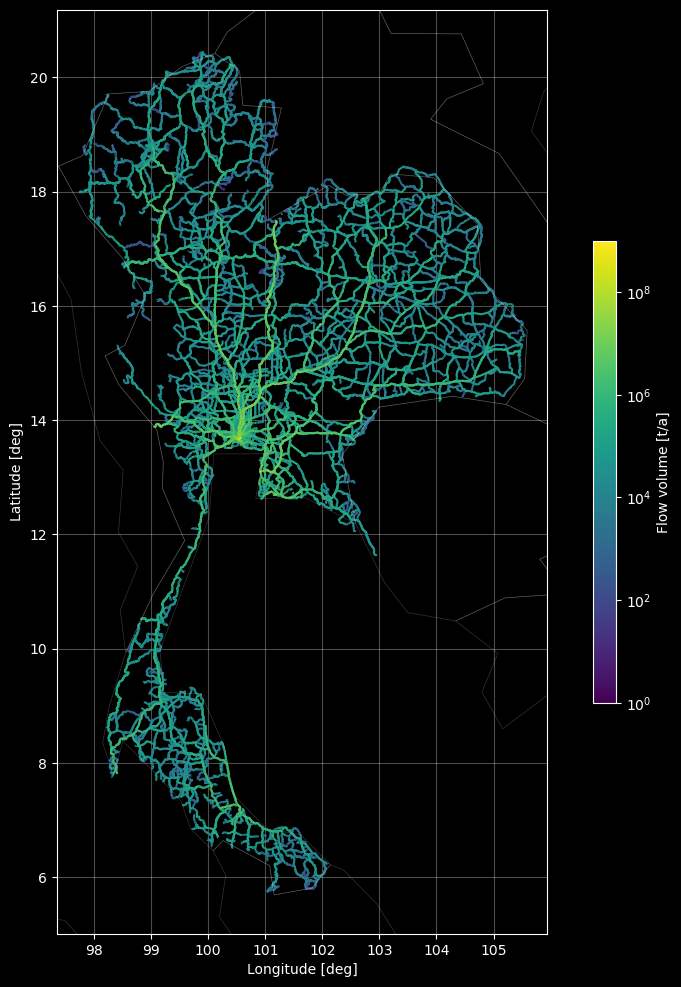

In [428]:
f, ax = plt.subplots(figsize=(12, 12))

to_plot = edges[
    (edges.volume_tons != 0) 
    & edges["mode"].isin(
        {
            'road_rail',
            'maritime_road',
            'maritime_rail',
            'road',
            'rail',
            #'maritime',
            #'imaginary'
        }
    )
]
not_imaginary_mask = to_plot["mode"] != "imaginary"
norm = LogNorm(10**min_base_10_exp, 10**max_base_10_exp)
to_plot[not_imaginary_mask].sort_values("volume_tons").plot("volume_tons", ax=ax, legend=True, norm=norm, legend_kwds={"shrink": 0.5, "label": "Flow volume [t/a]"})
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
world.plot(ax=ax, lw=0.5, alpha=0.2)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(alpha=0.3)
ax.set_xlabel("Longitude [deg]")
ax.set_ylabel("Latitude [deg]")
f.savefig("trade_flow_allocation_local.png")

In [403]:
routes_path = os.path.join(root_dir, "results/flow_allocation/project-thailand/routes.pq")
routes_with_edge_indices: pd.DataFrame = pd.read_parquet(routes_path)

cost_col_id = edges.columns.get_loc("cost_USD_t")
#geometry_col_id = edges.columns.get_loc("geometry")
routes_with_geometry = []
for index, route_data in tqdm(routes_with_edge_indices.iterrows(), total=len(routes_with_edge_indices):
    source_node, destination_node = index
    
    # drop edges missing geometry (we expect these for within port connections
    #route_edge_geometry = edges.iloc[route_data["edge_indices"], geometry_col_id].dropna()
    #route_linestring = linemerge(list(route_edge_geometry))
    cost_USD_t = edges.iloc[route_data.edge_indices, cost_col_id].sum()
    if 1E6 < cost_USD_t < 2E6:
        cost_USD_t -= 1E6
    elif cost_USD_t == 0:
        pass
    else:
        # cost more than $2M USD means more than one $1M USD imaginary link -- not a valid route
        # discard these
        continue
    routes_with_geometry.append(
        (
            source_node,
            destination_node.split("_")[-1],
            route_data.value_kusd,
            route_data.volume_tons,
            cost_USD_t,
            #route_linestring
        )
    )

routes = pd.DataFrame(routes_with_geometry, columns=["source_node", "destination_node", "value_kusd", "volume_tons", "cost_USD_t"])#, "geometry"])
routes

324008it [01:39, 3248.42it/s]

3000071.5461516995 laos-latest_11_16 GID_0_AGO
3000047.872827948 laos-latest_11_16 GID_0_ARE
3000072.492742761 laos-latest_11_16 GID_0_ARG
3000042.008120929 laos-latest_11_16 GID_0_AUS
3000054.176559507 laos-latest_11_16 GID_0_BEL
3000066.073881865 laos-latest_11_16 GID_0_BEN
3000046.314545107 laos-latest_11_16 GID_0_BGD
3000053.4357195105 laos-latest_11_16 GID_0_BGR
3000046.8877840396 laos-latest_11_16 GID_0_BHR
3000066.770173978 laos-latest_11_16 GID_0_BHS
3000064.775758523 laos-latest_11_16 GID_0_BRA
3000045.7795860046 laos-latest_11_16 GID_0_BRN
3000062.505921367 laos-latest_11_16 GID_0_CAN
3000075.7956365547 laos-latest_11_16 GID_0_CHL
3000044.173402664 laos-latest_11_16 GID_0_CHN
3000054.6906371047 laos-latest_11_16 GID_0_DEU
3000052.771530436 laos-latest_11_16 GID_0_DZA
3000055.7913301354 laos-latest_11_16 GID_0_EGY
3000050.3482069843 laos-latest_11_16 GID_0_ESP
3000051.670288665 laos-latest_11_16 GID_0_FRA
3000053.1164402454 laos-latest_11_16 GID_0_GBR
3000064.7683688477 laos-l

331550it [01:42, 3163.57it/s]

3000071.5479522487 thailand-latest_38_730 GID_0_AGO
3000047.8746284978 thailand-latest_38_730 GID_0_ARE
3000072.4945433103 thailand-latest_38_730 GID_0_ARG
3000042.0099214786 thailand-latest_38_730 GID_0_AUS
3000054.1783600566 thailand-latest_38_730 GID_0_BEL
3000046.3163456563 thailand-latest_38_730 GID_0_BGD
3000053.4375200598 thailand-latest_38_730 GID_0_BGR
3000046.889584589 thailand-latest_38_730 GID_0_BHR
3000064.7775590727 thailand-latest_38_730 GID_0_BRA
3000045.7813865542 thailand-latest_38_730 GID_0_BRN
3000062.507721917 thailand-latest_38_730 GID_0_CAN
3000075.7974371044 thailand-latest_38_730 GID_0_CHL
3000044.175203213 thailand-latest_38_730 GID_0_CHN
3000054.692437654 thailand-latest_38_730 GID_0_DEU
3000052.7733309856 thailand-latest_38_730 GID_0_DZA
3000055.7931306846 thailand-latest_38_730 GID_0_EGY
3000050.350007534 thailand-latest_38_730 GID_0_ESP
3000051.6720892144 thailand-latest_38_730 GID_0_FRA
3000053.118240795 thailand-latest_38_730 GID_0_GBR
3000064.770169397 

1268175it [06:15, 3321.88it/s]

3000039.0820333916 myanmar-latest_48_69 GID_0_AGO
3000018.013681479 myanmar-latest_48_69 GID_0_ARE
3000016.9702402153 myanmar-latest_48_69 GID_0_AUS
3000005.3027404654 myanmar-latest_48_69 GID_0_BGD
3000030.0543051837 myanmar-latest_48_69 GID_0_BRA
3000032.7682429347 myanmar-latest_48_69 GID_0_CAN
3000008.067672685 myanmar-latest_48_69 GID_0_CHN
3000024.686035483 myanmar-latest_48_69 GID_0_DEU
3000015.1427604402 myanmar-latest_48_69 GID_0_HKG
3000009.662986951 myanmar-latest_48_69 GID_0_IDN
3000006.66554813 myanmar-latest_48_69 GID_0_IND
3000016.762824271 myanmar-latest_48_69 GID_0_JPN
3000013.8107077177 myanmar-latest_48_69 GID_0_KHM
3000015.1544720726 myanmar-latest_48_69 GID_0_KOR
3000006.003111021 myanmar-latest_48_69 GID_0_LAO
3000008.6065180167 myanmar-latest_48_69 GID_0_MYS
3000015.369588206 myanmar-latest_48_69 GID_0_PHL
3000016.280990305 myanmar-latest_48_69 GID_0_QAT
3000015.801796276 myanmar-latest_48_69 GID_0_SAU
3000009.453608402 myanmar-latest_48_69 GID_0_SGP
3000013.2912

1271211it [06:16, 3375.37it/s]

3000039.078608001 thailand-latest_10_955 GID_0_AGO
3000018.0102560883 thailand-latest_10_955 GID_0_ARE
3000016.9668148253 thailand-latest_10_955 GID_0_AUS
3000005.2993150754 thailand-latest_10_955 GID_0_BGD
3000030.0508797932 thailand-latest_10_955 GID_0_BRA
3000032.7648175443 thailand-latest_10_955 GID_0_CAN
3000008.064247295 thailand-latest_10_955 GID_0_CHN
3000024.6826100927 thailand-latest_10_955 GID_0_DEU
3000015.1393350502 thailand-latest_10_955 GID_0_HKG
3000009.6595615605 thailand-latest_10_955 GID_0_IDN
3000006.66212274 thailand-latest_10_955 GID_0_IND
3000016.7593988804 thailand-latest_10_955 GID_0_JPN
3000013.8072823277 thailand-latest_10_955 GID_0_KHM
3000015.1510466826 thailand-latest_10_955 GID_0_KOR
3000005.9996856307 thailand-latest_10_955 GID_0_LAO
3000008.6030926267 thailand-latest_10_955 GID_0_MYS
3000015.366162816 thailand-latest_10_955 GID_0_PHL
3000016.277564915 thailand-latest_10_955 GID_0_QAT
3000015.7983708857 thailand-latest_10_955 GID_0_SAU
3000009.4501830125

1391141it [06:51, 3477.19it/s]

3000036.714979022 thailand-latest_36_607 GID_0_AGO
3000013.0416552704 thailand-latest_36_607 GID_0_ARE
3000037.6615700833 thailand-latest_36_607 GID_0_ARG
3000011.1074962 thailand-latest_36_607 GID_0_AUS
3000040.367391264 thailand-latest_36_607 GID_0_AZE
3000019.25105532 thailand-latest_36_607 GID_0_BEL
3000031.1483776774 thailand-latest_36_607 GID_0_BEN
3000011.3890409195 thailand-latest_36_607 GID_0_BGD
3000018.604546833 thailand-latest_36_607 GID_0_BGR
3000012.056611362 thailand-latest_36_607 GID_0_BHR
3000031.84466979 thailand-latest_36_607 GID_0_BHS
3000029.8502543354 thailand-latest_36_607 GID_0_BRA
3000010.854081817 thailand-latest_36_607 GID_0_BRN
3000027.8473403687 thailand-latest_36_607 GID_0_CAN
3000040.870132367 thailand-latest_36_607 GID_0_CHL
3000008.241949091 thailand-latest_36_607 GID_0_CHN
3000029.734328085 thailand-latest_36_607 GID_0_CIV
3000031.330774041 thailand-latest_36_607 GID_0_CMR
3000019.765132917 thailand-latest_36_607 GID_0_DEU
3000017.8460262483 thailand-l

1845820it [09:03, 3485.40it/s]

3000037.383838441 cambodia-latest_5_13 GID_0_AGO
3000013.7105146903 cambodia-latest_5_13 GID_0_ARE
3000038.3304295028 cambodia-latest_5_13 GID_0_ARG
3000011.7763556195 cambodia-latest_5_13 GID_0_AUS
3000019.919914739 cambodia-latest_5_13 GID_0_BEL
3000012.057900339 cambodia-latest_5_13 GID_0_BGD
3000019.2734062523 cambodia-latest_5_13 GID_0_BGR
3000030.519113755 cambodia-latest_5_13 GID_0_BRA
3000028.516199788 cambodia-latest_5_13 GID_0_CAN
3000008.9108085106 cambodia-latest_5_13 GID_0_CHN
3000020.4339923365 cambodia-latest_5_13 GID_0_DEU
3000018.5148856677 cambodia-latest_5_13 GID_0_DZA
3000021.629016877 cambodia-latest_5_13 GID_0_EGY
3000016.1858937265 cambodia-latest_5_13 GID_0_ESP
3000017.507975407 cambodia-latest_5_13 GID_0_FRA
3000018.8597954772 cambodia-latest_5_13 GID_0_GBR
3000012.2668740326 cambodia-latest_5_13 GID_0_HKG
3000005.4936475763 cambodia-latest_5_13 GID_0_IDN
3000010.589725901 cambodia-latest_5_13 GID_0_IND
3000014.415616777 cambodia-latest_5_13 GID_0_IRN
3000014.5

1855624it [09:05, 3399.42it/s]


,source_node,destination_node,value_kusd,volume_tons,cost_USD_t
0,thailand-latest_14_1060,ARE,5.958418,8.921528,58.459978
1,thailand-latest_14_1060,AUS,10.831574,15.529106,52.595271
2,thailand-latest_14_1060,BRA,8.044474,14.040133,75.362909
3,thailand-latest_14_1060,CHN,85.528901,55.493995,54.760553
4,thailand-latest_14_1060,IDN,9.702360,15.393054,49.257431
...,...,...,...,...,...
1855184,thailand-latest_43_1,UKR,48.922350,212.249358,35.709131
1855185,thailand-latest_43_1,USA,902.105972,849.824179,41.797310
1855186,thailand-latest_43_1,VNM,341.433377,218.612088,24.756856
1855187,thailand-latest_43_1,YEM,3.714923,5.076645,37.233279


In [406]:
# we need at least the top 20 trading partners to get 90% of the trade volume
# here we only have 8 partners total (all in the top 20)
routes.loc[:, ["destination_node", "volume_tons"]].groupby("destination_node").sum().sort_values("volume_tons", ascending=False)

,volume_tons
destination_node,
CHN,4.465009e+07
IDN,2.747134e+07
ARE,1.903900e+07
AUS,1.795330e+07
JPN,1.760239e+07
...,...
CUB,1.989602e+01
GRD,1.406697e+01
VCT,1.352316e+01


In [407]:
volume_tons_by_country = routes.loc[:, ["destination_node", "volume_tons"]].groupby("destination_node").sum()
volume_tons_by_country.index.name = "GID_0"
# country boundaries for diagnostic plotting
countries = gpd.read_parquet(os.path.join(root_dir, "results/input/admin-boundaries/admin-level-0.geoparquet"))
volume_tons_by_country_with_geom = countries.set_index("GID_0", drop=True).join(volume_tons_by_country)

Text(0.5, 1.0, 'Partner country trade volume [t/a] post-allocation')

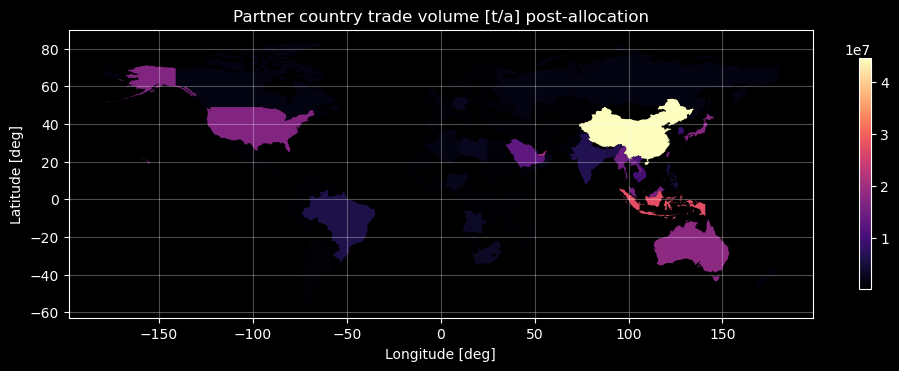

In [410]:
f, ax = plt.subplots(figsize=(12, 10))
volume_tons_by_country_with_geom.plot("volume_tons", ax=ax, legend=True, legend_kwds={"shrink": 0.3}, cmap="magma")
ax.grid(alpha=0.3)
ax.set_xlabel("Longitude [deg]")
ax.set_ylabel("Latitude [deg]")
ax.set_title("Partner country trade volume [t/a] post-allocation")